# CASE STUDY: IRIS PLANT CLASSIFICATION USING RANDOM FOREST





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes representing class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




# STEP #1: IMPORTING DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Iris.csv')

# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Let's view the head of the training dataset
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Let's view the last elements in the training dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

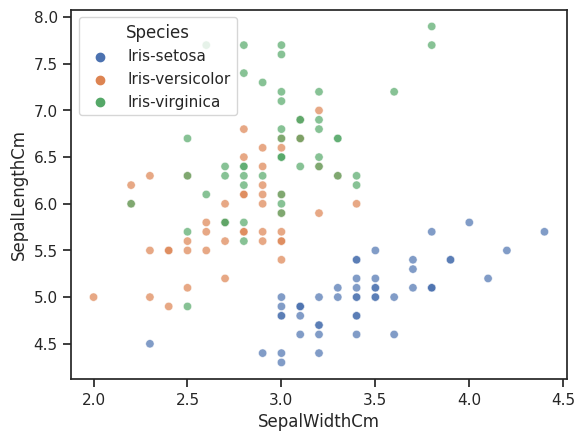

In [ ]:
sns.scatterplot(x='SepalWidthCm',y='SepalLengthCm',hue='Species',data=df,alpha=0.7)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

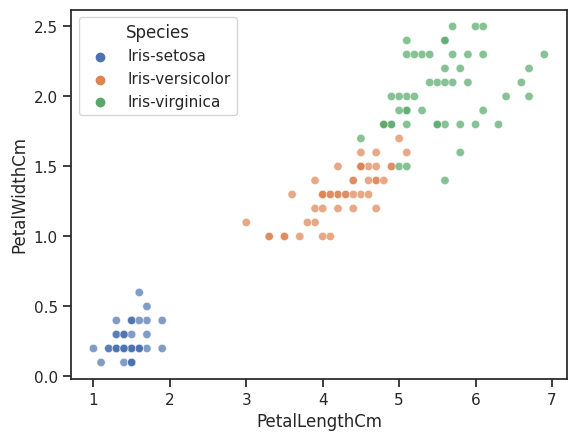

In [ ]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df,alpha=0.7)

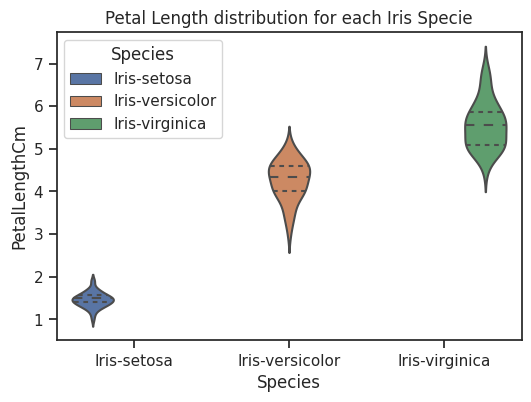

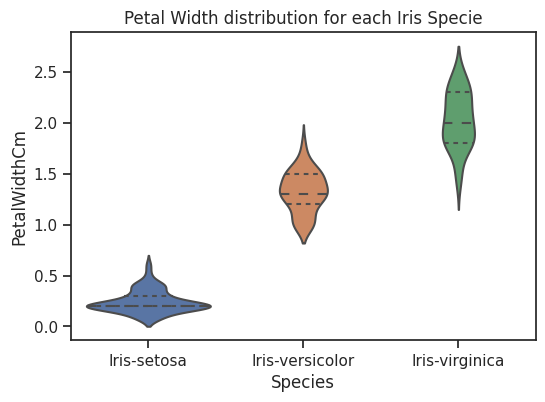

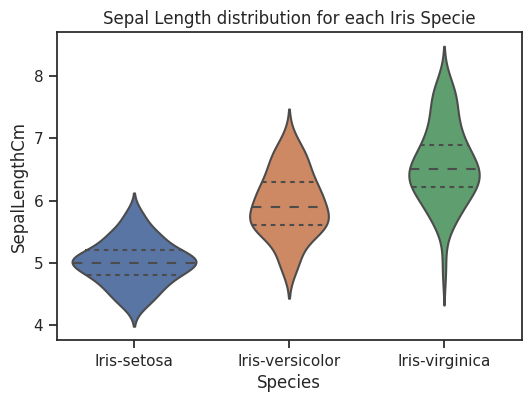

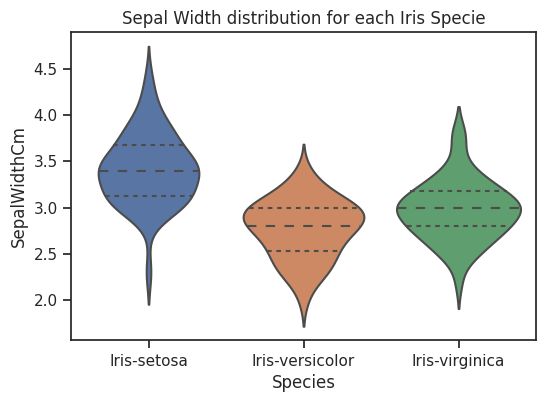

In [ ]:
# Let's show the Violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='Species', y='PetalLengthCm', hue = 'Species',data=df, inner='quartile')
plt.title('Petal Length distribution for each Iris Specie')
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x='Species', y='PetalWidthCm', data=df, inner='quartile')
plt.title('Petal Width distribution for each Iris Specie')
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x='Species', y='SepalLengthCm', data=df, inner='quartile')
plt.title('Sepal Length distribution for each Iris Specie')
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x='Species', y='SepalWidthCm', data=df, inner='quartile')
plt.title('Sepal Width distribution for each Iris Specie')
plt.show()


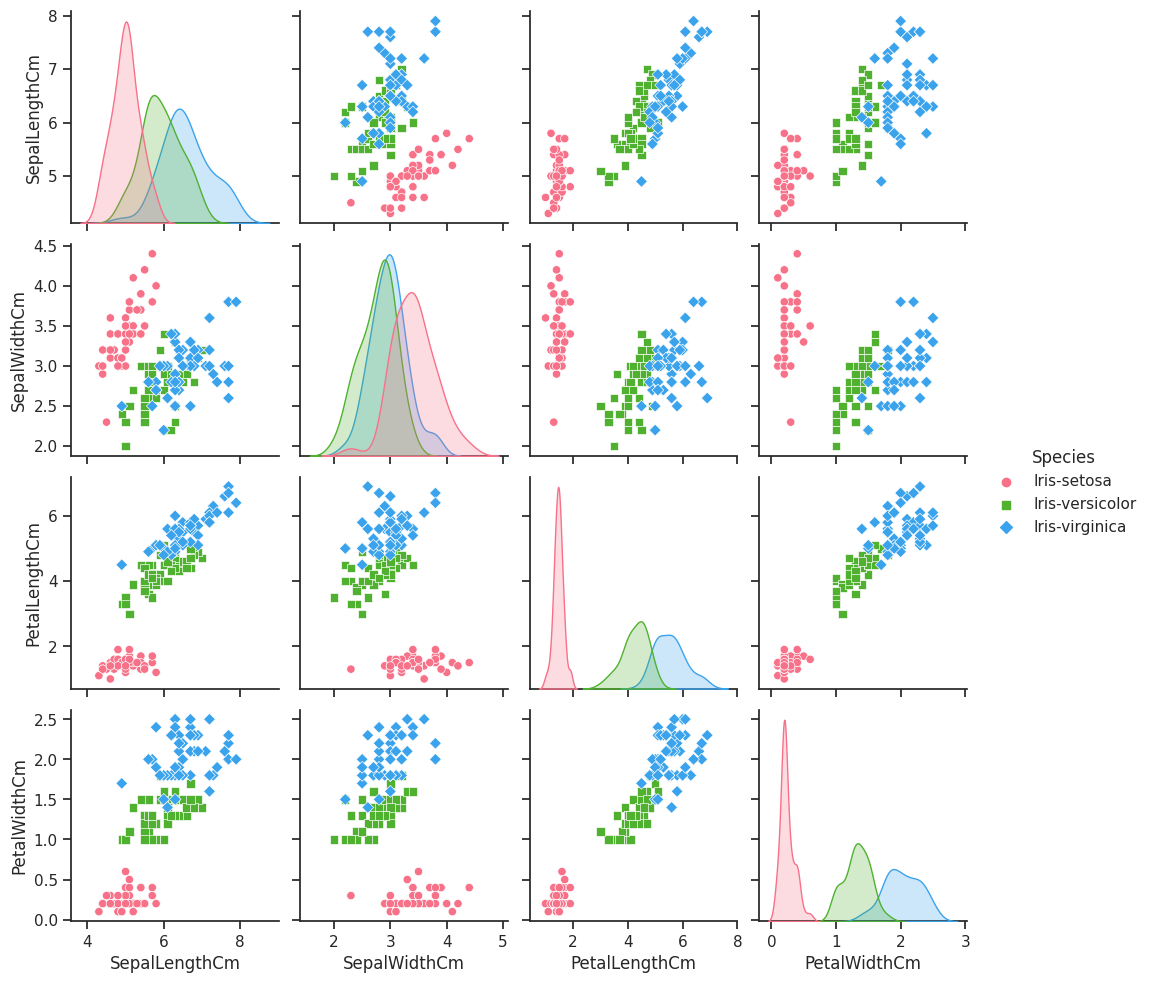

In [ ]:
# Let's try the Seaborn pairplot
sns.set(style="ticks")
sns.pairplot(df, hue="Species", markers=["o", "s", "D"], palette="husl")
plt.show()

<ipython-input-54-ad34be9b35c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


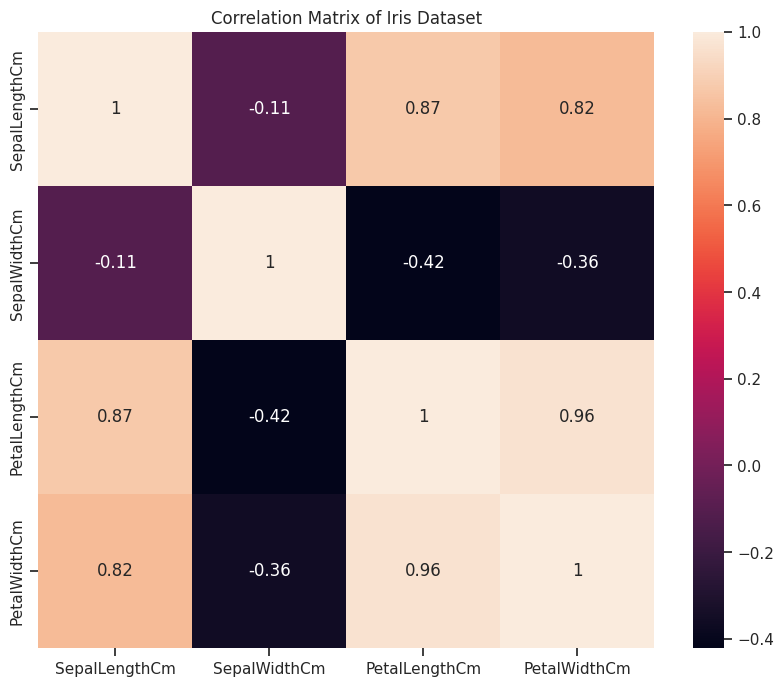

In [ ]:
# Let's check the correlation between the variables
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

# STEP #3: DATA CLEANING

In [ ]:
# Let's drop the ID and Species (target label) coloumns
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.drop('Species',axis=1)
y = df['Species']

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# STEP #4: TRAINING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(scaled_X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_train.shape

(97, 4)

In [ ]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2
40,5.0,3.5,1.3,0.3


# STEP #5: EVALUATING THE MODEL

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9811320754716981

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[19,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 16]])

<Axes: >

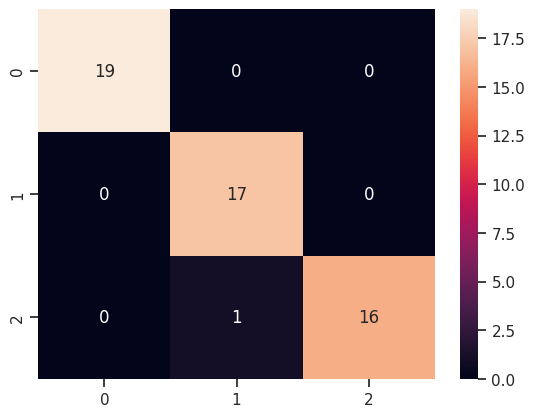

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53



In [ ]:
# Saving Model
import pickle

In [ ]:
# Assuming you have a trained model named 'model'
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
import os
print("Current directory:", os.getcwd())

Current directory: /content
